In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## MNIST Dataset

In [3]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

In [4]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

60000
60000
10000
10000


In [5]:
print(X_train[0].shape)
print(Y_train[0].shape)
print(X_test[0].shape)
print(Y_test[0].shape)

(28, 28)
()
(28, 28)
()


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

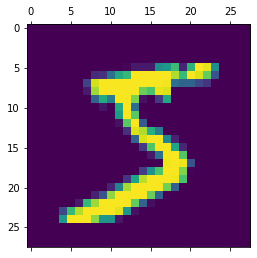

In [8]:
plt.matshow(X_train[0])

In [9]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [16]:
#Scaling the values
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
print(X_train_flattened)
print(len(X_train_flattened))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
60000


In [18]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(len(X_test_flattened))

10000


In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating a Simple Neural Network 

In [21]:
#sequential means we are having a stack of layers in our neural network
#stack will accept every layer as one element
#Dense means all neurons in one layer is connected to every neuron in the second layer
#Keras.layers.Dense is an api
#output shape is 10
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')])
#Now complile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Now supply the training set to train
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4911 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3057 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2748 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2676 - accuracy: 0.9262


In [22]:
#Evaluate accuracy on test dataset
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9257


[0.26839831471443176, 0.9257000088691711]

In [23]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[0]

array([1.6281374e-05, 1.9016136e-10, 4.4609835e-05, 9.2279315e-03,
       8.8016100e-07, 1.0602583e-04, 1.1719999e-09, 7.8049368e-01,
       5.5505450e-05, 1.0667145e-03], dtype=float32)

In [24]:
np.argmax(Y_predicted[0])

7

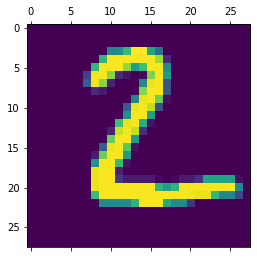

In [25]:
plt.matshow(X_test[1])

In [26]:
Y_predicted[1]

array([2.6860833e-04, 3.0855524e-06, 5.0445426e-01, 1.4704466e-04,
       6.9615327e-14, 2.0874143e-03, 1.7989576e-03, 3.3349439e-16,
       6.2482446e-05, 6.7840395e-13], dtype=float32)

In [27]:
np.argmax(Y_predicted[1])

2

In [32]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 5,
 0,
 2,
 4,
 2,


In [33]:
Y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [35]:
#math is a modeule in tf
confusion_matrix = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels)

In [36]:
#Confusion matrix to evaluate the performance of our model
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    6,    7,    4,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   3,   12,  928,   15,    7,    5,   11,   11,   36,    4],
       [   2,    0,   22,  918,    0,   29,    2,   12,   18,    7],
       [   1,    2,    6,    1,  902,    0,   11,    4,    7,   48],
       [   7,    3,    4,   25,    8,  794,   11,    6,   25,    9],
       [   7,    3,    5,    1,    7,   16,  914,    2,    3,    0],
       [   1,    8,   24,    4,    3,    1,    0,  948,    1,   38],
       [   6,   13,    8,   24,    9,   33,    9,   12,  844,   16],
       [  10,    7,    1,   11,   18,    4,    0,   21,    7,  930]])>

In [37]:
print(confusion_matrix)

tf.Tensor(
[[ 960    0    1    1    0    6    7    4    1    0]
 [   0 1119    3    2    0    1    4    2    4    0]
 [   3   12  928   15    7    5   11   11   36    4]
 [   2    0   22  918    0   29    2   12   18    7]
 [   1    2    6    1  902    0   11    4    7   48]
 [   7    3    4   25    8  794   11    6   25    9]
 [   7    3    5    1    7   16  914    2    3    0]
 [   1    8   24    4    3    1    0  948    1   38]
 [   6   13    8   24    9   33    9   12  844   16]
 [  10    7    1   11   18    4    0   21    7  930]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

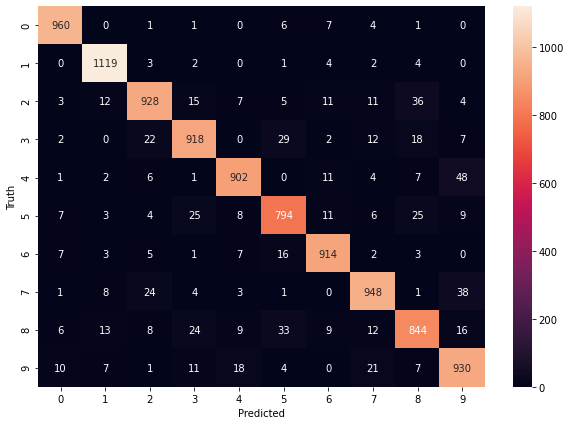

In [42]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer to our simple neural network

In [44]:
#Performance would be improved here by adding hidden layer/layers

In [55]:
model1 = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
                         keras.layers.Dense(10,activation = 'sigmoid')
                         ])
                        #Second layer doesn't require a input_shape,it will figure out on it's own
#Now complile the neural network
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Now supply the training set to train
model1.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1332 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0976 - accuracy: 0.9706
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0615 - accuracy: 0.9812


In [56]:
#Adding mpre hidden layers in this case
model2 = keras.Sequential([keras.layers.Dense(200,input_shape=(784,),activation = 'relu'),
                         keras.layers.Dense(10,activation = 'sigmoid')
                         ])
                        #Second layer doesn't require a input_shape,it will figure out on it's own
#Now complile the neural network
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Now supply the training set to train
model2.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2540 - accuracy: 0.9285
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1083 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0545 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9876


In [57]:
model1.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9731


[0.08842237293720245, 0.9731000065803528]

In [58]:
model2.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 564us/step - loss: 0.0757 - accuracy: 0.9777


[0.07571898400783539, 0.9776999950408936]

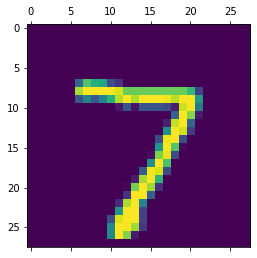

In [59]:
plt.matshow(X_test[0])

In [60]:
Y_predicted1 = model1.predict(X_test_flattened)
Y_predicted1[0]

array([1.6853278e-06, 3.0355576e-08, 4.7510093e-06, 4.3690205e-04,
       2.0050402e-10, 7.5700832e-06, 1.1059296e-09, 6.3143843e-01,
       4.0045779e-05, 7.8254889e-06], dtype=float32)

In [64]:
np.argmax(Y_predicted1[0])

7

In [61]:
Y_predicted_labels_1 = [np.argmax(i) for i in Y_predicted1]
Y_predicted_labels_1

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [62]:
Y_predicted_labels_1[0:5]

[7, 2, 1, 0, 4]

In [68]:
confusion_matrix_1 = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels_1)
confusion_matrix_1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    0,    1,    1,    0,    1,    2,    1],
       [   0, 1115,    3,    1,    0,    1,    4,    1,   10,    0],
       [  12,    2,  984,    4,    3,    0,    1,    9,   17,    0],
       [   1,    0,    3,  994,    0,    1,    0,    5,    5,    1],
       [   2,    0,    1,    0,  963,    0,    4,    1,    3,    8],
       [   3,    0,    0,   16,    1,  864,    3,    1,    3,    1],
       [   7,    1,    1,    0,    5,    4,  937,    0,    3,    0],
       [   2,    4,    5,    3,    1,    0,    0,  997,    8,    8],
       [  11,    0,    1,    5,    4,    8,    2,    3,  938,    2],
       [   3,    4,    0,    8,   11,    2,    0,    4,   11,  966]])>

In [69]:
print(confusion_matrix_1)

tf.Tensor(
[[ 973    0    1    0    1    1    0    1    2    1]
 [   0 1115    3    1    0    1    4    1   10    0]
 [  12    2  984    4    3    0    1    9   17    0]
 [   1    0    3  994    0    1    0    5    5    1]
 [   2    0    1    0  963    0    4    1    3    8]
 [   3    0    0   16    1  864    3    1    3    1]
 [   7    1    1    0    5    4  937    0    3    0]
 [   2    4    5    3    1    0    0  997    8    8]
 [  11    0    1    5    4    8    2    3  938    2]
 [   3    4    0    8   11    2    0    4   11  966]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

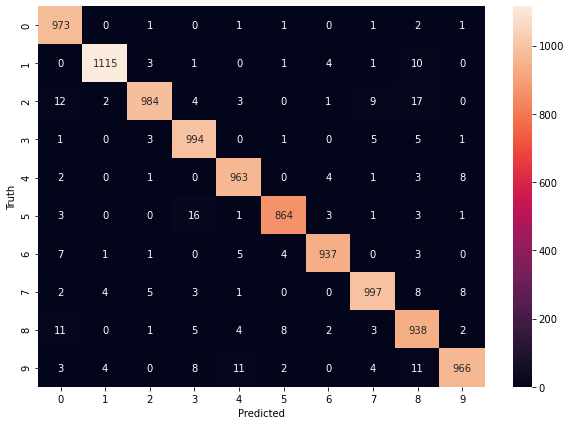

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[[4.8069939e-08 8.1826826e-08 7.1368108e-06 ... 7.6346111e-01
  3.9979454e-07 1.1778474e-03]
 [1.7703922e-08 3.7884871e-05 2.7958959e-01 ... 1.1615808e-12
  7.3124858e-07 2.7442722e-11]
 [5.6009480e-07 6.4225996e-01 7.4499699e-06 ... 6.8063338e-05
  6.3247549e-05 4.5602488e-07]
 ...
 [3.4381713e-11 5.4006684e-09 1.2619385e-11 ... 3.0073513e-06
  3.3028488e-07 2.3886561e-04]
 [2.0509419e-09 4.0039048e-11 9.5470559e-12 ... 1.6477140e-09
  1.6719103e-04 3.6810764e-08]
 [2.0491939e-09 8.8126069e-12 2.2784199e-08 ... 3.5992966e-12
  1.8293403e-09 3.5112364e-11]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 

Text(69.0, 0.5, 'Truth')

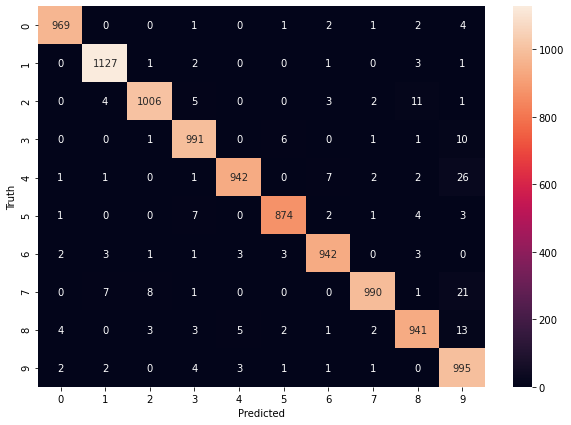

In [71]:
Y_predicted2 = model2.predict(X_test_flattened)
Y_predicted2[0]

print(Y_predicted2)

Y_predicted_labels_2 = [np.argmax(i) for i in Y_predicted2]
Y_predicted_labels_2

print(Y_predicted_labels_2)

print(Y_predicted_labels_2[0:5])

confusion_matrix_2 = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels_2)
confusion_matrix_2

print(confusion_matrix_2)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using flattened layer of keras insted of making flattened array

In [73]:
#Adding mpre hidden layers in this case
model3 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(200,activation = 'relu'),
                         keras.layers.Dense(10,activation = 'sigmoid')
                         ])
                        #Second layer doesn't require a input_shape,it will figure out on it's own
#Now complile the neural network
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Now supply the training set to train
model3.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2595 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 2s 932us/step - loss: 0.1119 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0765 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.0429 - accuracy: 0.9862


In [74]:
model3.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 572us/step - loss: 0.0783 - accuracy: 0.9768


[0.07829124480485916, 0.9768000245094299]

In [75]:
model3.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 863us/step - loss: 0.0783 - accuracy: 0.9768


[0.07829124480485916, 0.9768000245094299]

[[4.8233510e-08 4.1432315e-08 3.4374914e-06 ... 6.9745612e-01
  9.6591075e-06 8.8634544e-05]
 [8.3109697e-08 1.2759778e-05 5.0154650e-01 ... 4.7623011e-13
  2.2703547e-07 3.2030580e-12]
 [2.8308236e-07 2.0403332e-01 1.0561091e-05 ... 7.6679084e-05
  1.4272332e-04 7.6997912e-07]
 ...
 [2.2954739e-13 4.5361964e-11 1.3979599e-12 ... 2.4076860e-07
  3.5278043e-07 3.8186627e-05]
 [6.0019445e-08 4.0029926e-09 1.2202408e-09 ... 4.7691895e-10
  1.5413761e-04 1.1849124e-10]
 [8.1159612e-10 2.2059386e-11 5.2537491e-10 ... 1.3549459e-13
  2.6802630e-10 4.4535525e-11]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 

Text(69.0, 0.5, 'Truth')

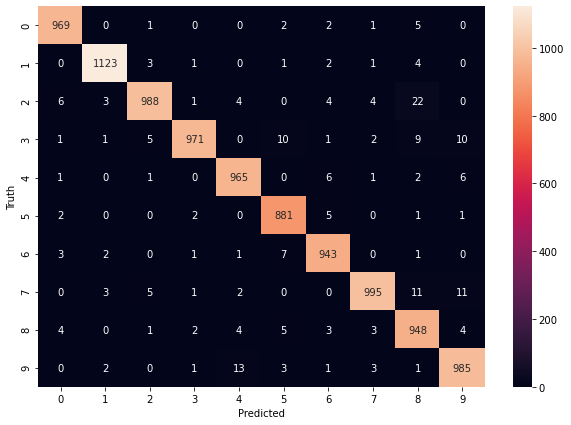

In [76]:
Y_predicted3 = model3.predict(X_test)
Y_predicted3[0]

print(Y_predicted3)

Y_predicted_labels_3 = [np.argmax(i) for i in Y_predicted3]
Y_predicted_labels_3

print(Y_predicted_labels_3)

print(Y_predicted_labels_3[0:5])

confusion_matrix_3 = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels_3)
confusion_matrix_3

print(confusion_matrix_3)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[[4.8233510e-08 4.1432315e-08 3.4374914e-06 ... 6.9745612e-01
  9.6591075e-06 8.8634544e-05]
 [8.3109697e-08 1.2759778e-05 5.0154650e-01 ... 4.7623011e-13
  2.2703547e-07 3.2030580e-12]
 [2.8308236e-07 2.0403332e-01 1.0561091e-05 ... 7.6679084e-05
  1.4272332e-04 7.6997912e-07]
 ...
 [2.2954739e-13 4.5361964e-11 1.3979599e-12 ... 2.4076860e-07
  3.5278043e-07 3.8186627e-05]
 [6.0019445e-08 4.0029926e-09 1.2202408e-09 ... 4.7691895e-10
  1.5413761e-04 1.1849124e-10]
 [8.1159612e-10 2.2059386e-11 5.2537491e-10 ... 1.3549459e-13
  2.6802630e-10 4.4535525e-11]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 

Text(69.0, 0.5, 'Truth')

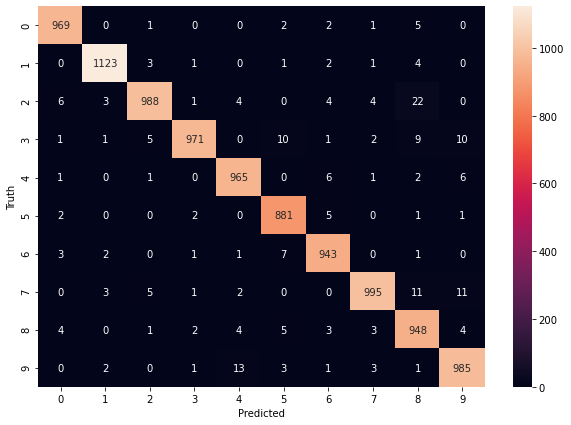

In [77]:
Y_predicted3 = model3.predict(X_test_flattened)
Y_predicted3[0]

print(Y_predicted3)

Y_predicted_labels_3 = [np.argmax(i) for i in Y_predicted3]
Y_predicted_labels_3

print(Y_predicted_labels_3)

print(Y_predicted_labels_3[0:5])

confusion_matrix_3 = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels_3)
confusion_matrix_3

print(confusion_matrix_3)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')